In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
import numpy as np
from scipy import stats 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import ClusterWarning
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# DataFrame Limpio

In [2]:
df = pd.read_csv("DataFrame_CoronaVirus_Limpio_Estados_Dummies.csv")

In [3]:
del df["Unnamed: 0"]

#### DataFrame Limpio

In [4]:
df.columns

Index(['SEXO', 'TIPO_PACIENTE', 'NACIONALIDAD', 'INDIGENA', 'INTUBADO',
       'NEUMONIA', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', '0-30', '30-60', '60-90',
       'CLASIFICACION_FINAL', 'UCI', 'FALLECIDOS', 'Puebla',
       'Coahuila De Zaragoza', 'Ciudad De México', 'Estado De México',
       'Baja California Sur', 'Colima', 'Jalisco', 'Quintana Roo',
       'Guanajuato', 'Sonora', 'Durango', 'Tlaxcala', 'Baja California',
       'Michoacán De Ocampo', 'Aguascalientes', 'Tamaulipas', 'Zacatecas',
       'Chihuahua', 'Guerrero', 'Veracruz De Ignacio De La Llave', 'Sinaloa',
       'Querétaro', 'Yucatán', 'Hidalgo', 'San Luis Potosí', 'Tabasco',
       'Nuevo León', 'Chiapas', 'Morelos', 'Campeche', 'Oaxaca', 'Nayarit'],
      dtype='object')

# Utilizamos KModes: clustering para agrupaciones mixtas o esclusivamente categóricas

### .<font color='papayawhip'>Diseñado para agrupar grandes conjuntos de datos categóricos,  tiene como objetivo obtener las k modas que representan al conjunto.</font>

 ### Búsqueda del Cluster adecuado.

In [75]:
cost = []
for i in list(range(1,5)):
    kmode = KModes(n_clusters=i, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9428632.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 224401, cost: 8620229.0
Run 1, iteration: 2/100, moves: 72990, cost: 8600903.0
Run 1, iteration: 3/100, moves: 3314, cost: 8600903.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 230636, cost: 8406679.0
Run 1, iteration: 2/100, moves: 111832, cost: 8393627.0
Run 1, iteration: 3/100, moves: 15205, cost: 8393627.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 863248, cost: 7192790.0
Run 1, iteration: 2/100, moves: 74837, cost: 7192790.0


## Obtenemos el codo, que nos indica que el valor oscila entre dos y tres aproximadamente

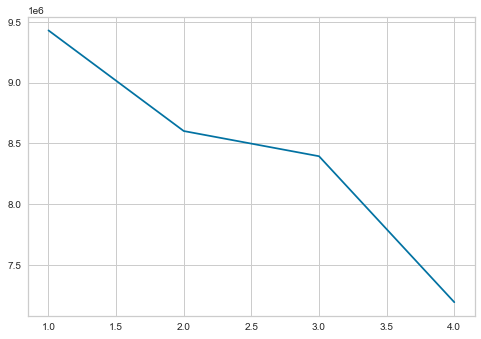

In [76]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

### Elegimos Kmodes =  3

In [115]:
import numpy as np
from kmodes.kmodes import KModes

# Todo el DataFrame es Categórico. Utilizamos el KModes para obtener una aproximación de los centroides.

km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df, categorical= len(df.columns))

# Imprimimos los clusters: centroides
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 908339, cost: 7607758.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 733623, cost: 7890210.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 717283, cost: 7666970.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 564201, cost: 7793407.0
Run 4, iteration: 2/100, moves: 336546, cost: 7788483.0
Run 4, iteration: 3/100, moves: 90519, cost: 7788483.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 736447, cost: 7305449.0
Best run was number 5
[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

### Obtenemos los centroides

In [132]:
clusters

array([1, 0, 2, ..., 2, 2, 2], dtype=uint16)

In [133]:
Centroides2 = pd.DataFrame(km.cluster_centroids_)
Centroides2.columns = df.columns

In [134]:
Centroides2

,SEXO,TIPO_PACIENTE,NACIONALIDAD,INDIGENA,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,0-30,30-60,60-90,CLASIFICACION_FINAL,UCI,FALLECIDOS,Puebla,Coahuila De Zaragoza,Ciudad De México,Estado De México,Baja California Sur,Colima,Jalisco,Quintana Roo,Guanajuato,Sonora,Durango,Tlaxcala,Baja California,Michoacán De Ocampo,Aguascalientes,Tamaulipas,Zacatecas,Chihuahua,Guerrero,Veracruz De Ignacio De La Llave,Sinaloa,Querétaro,Yucatán,Hidalgo,San Luis Potosí,Tabasco,Nuevo León,Chiapas,Morelos,Campeche,Oaxaca,Nayarit
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
df3 = df.copy().reset_index()

### Agrupamos los clusters con nuestro dataframe

In [135]:
clustersDf3 = pd.DataFrame(clusters)
clustersDf3.columns = ['cluster_predicted3']
combinedDf3 = pd.concat([df3, clustersDf3], axis = 1).reset_index()
combinedDf3

,level_0,index,SEXO,TIPO_PACIENTE,NACIONALIDAD,INDIGENA,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,0-30,30-60,60-90,CLASIFICACION_FINAL,UCI,FALLECIDOS,Puebla,Coahuila De Zaragoza,Ciudad De México,Estado De México,Baja California Sur,Colima,Jalisco,Quintana Roo,Guanajuato,Sonora,Durango,Tlaxcala,Baja California,Michoacán De Ocampo,Aguascalientes,Tamaulipas,Zacatecas,Chihuahua,Guerrero,Veracruz De Ignacio De La Llave,Sinaloa,Querétaro,Yucatán,Hidalgo,San Luis Potosí,Tabasco,Nuevo León,Chiapas,Morelos,Campeche,Oaxaca,Nayarit,cluster_predicted3
0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,4,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219568,2219568,2219568,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2219569,2219569,2219569,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2219570,2219570,2219570,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2219571,2219571,2219571,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


### Limpiamos el nuevo DataFrame

In [136]:
combinedDf3 = combinedDf3.drop(['index', 'level_0'], axis = 1)

### Obtenemos el Dataframe final a falta de etiquetar y definir los grupos

In [148]:
combinedDf3

,SEXO,TIPO_PACIENTE,NACIONALIDAD,INDIGENA,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,0-30,30-60,60-90,CLASIFICACION_FINAL,UCI,FALLECIDOS,Puebla,Coahuila De Zaragoza,Ciudad De México,Estado De México,Baja California Sur,Colima,Jalisco,Quintana Roo,Guanajuato,Sonora,Durango,Tlaxcala,Baja California,Michoacán De Ocampo,Aguascalientes,Tamaulipas,Zacatecas,Chihuahua,Guerrero,Veracruz De Ignacio De La Llave,Sinaloa,Querétaro,Yucatán,Hidalgo,San Luis Potosí,Tabasco,Nuevo León,Chiapas,Morelos,Campeche,Oaxaca,Nayarit,cluster_predicted3
0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219568,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2219569,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2219570,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2219571,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


###  Copias de seguridad por si la lio ( que suele pasar a menudo)

In [149]:
combinedDf3.to_csv("DF_Etiquetas_K=3.csv")

In [176]:
cluster_03 = combinedDf3[combinedDf3['cluster_predicted3'] == 0].mean()
cluster_13 = combinedDf3[combinedDf3['cluster_predicted3'] == 1].mean()
cluster_23 = combinedDf3[combinedDf3['cluster_predicted3'] == 2].mean()
globales

In [147]:
AgrupacionFinal3.to_csv("Etiquetas_K=3.csv")

### Obtenemos las medias de cada cluster comparándolo con las globales. Únicamente para poder rdefinir nuestros grupos.

In [198]:
AgrupacionFinal3 = pd.concat([cluster_03, cluster_12,cluster_23, globales ], axis = 1).reset_index()


In [199]:
AgrupacionFinal3.columns = ["Atributos","Pacientes sanos Adultos / mayores -Ambulatorios-","Pacientes sanos Jóvenes -Ambulatorios-","Grupo de riesgo -Hospitalizados-", "Datos Globales"]


In [200]:
AgrupacionFinal3

,Atributos,Pacientes sanos Adultos / mayores -Ambulatorios-,Pacientes sanos Jóvenes -Ambulatorios-,Grupo de riesgo -Hospitalizados-,Datos Globales
0,SEXO,0.676105,0.244455,0.251796,0.515430
1,TIPO_PACIENTE,0.970704,0.753828,0.339790,0.842479
2,NACIONALIDAD,0.995329,0.995375,0.997072,0.995311
3,INDIGENA,0.008830,0.012248,0.015045,0.010613
4,INTUBADO,0.001384,0.037416,0.103867,0.021207
5,NEUMONIA,0.015491,0.174231,0.518684,0.111233
6,EMBARAZO,0.007128,0.004199,0.002318,0.008746
7,DIABETES,0.099127,0.147781,0.267856,0.116910
8,EPOC,0.008154,0.015669,0.031829,0.012212
9,ASMA,0.029842,0.022231,0.019820,0.027910


In [151]:
combinedDf3.columns

Index(['SEXO', 'TIPO_PACIENTE', 'NACIONALIDAD', 'INDIGENA', 'INTUBADO',
       'NEUMONIA', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', '0-30', '30-60', '60-90',
       'CLASIFICACION_FINAL', 'UCI', 'FALLECIDOS', 'Puebla',
       'Coahuila De Zaragoza', 'Ciudad De México', 'Estado De México',
       'Baja California Sur', 'Colima', 'Jalisco', 'Quintana Roo',
       'Guanajuato', 'Sonora', 'Durango', 'Tlaxcala', 'Baja California',
       'Michoacán De Ocampo', 'Aguascalientes', 'Tamaulipas', 'Zacatecas',
       'Chihuahua', 'Guerrero', 'Veracruz De Ignacio De La Llave', 'Sinaloa',
       'Querétaro', 'Yucatán', 'Hidalgo', 'San Luis Potosí', 'Tabasco',
       'Nuevo León', 'Chiapas', 'Morelos', 'Campeche', 'Oaxaca', 'Nayarit',
       'cluster_predicted3'],
      dtype='object')

# Graficamos para observar el global de pacientes por porsitivo según el cluster_predicted

#### El grupo 0 presenta el mayor número de positivos, pero también es la muestra de mayor tamaño agrupada. En su mayoría son pacientes ambulatorios de edad media que gozan de buena salud. A pesar de haberse contagiado, no existe un número elevado de fallecidos

#### El grupo 1 se conforma por gente joven y sana en un 90%. La muestra es inferior en tamaño a la del grupo 0 ya que el intervalo de edades no es tan acusado. Además, nos encontramos en un modelo demográfico cada vez más regresivo.

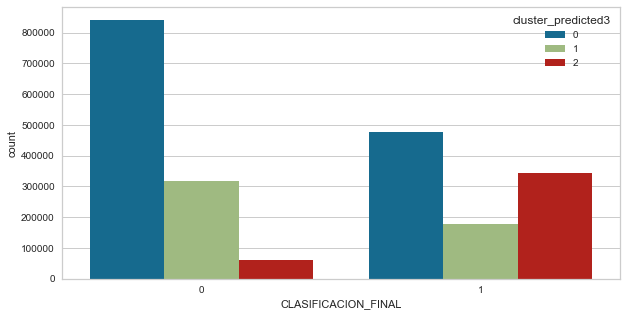

In [180]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['CLASIFICACION_FINAL'],order=combinedDf3["CLASIFICACION_FINAL"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()

# Grupo 2

### Se observa que el número de fallecidos más alto se encuentra en el grupo 2

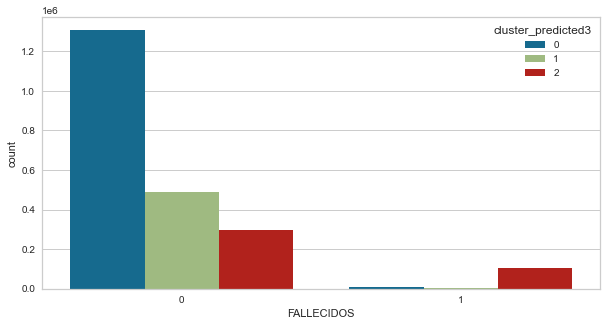

In [182]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['FALLECIDOS'],order=combinedDf3["FALLECIDOS"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()

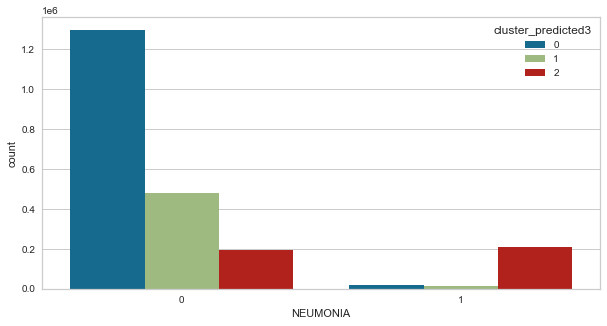

In [202]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['NEUMONIA'],order=combinedDf3["NEUMONIA"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()

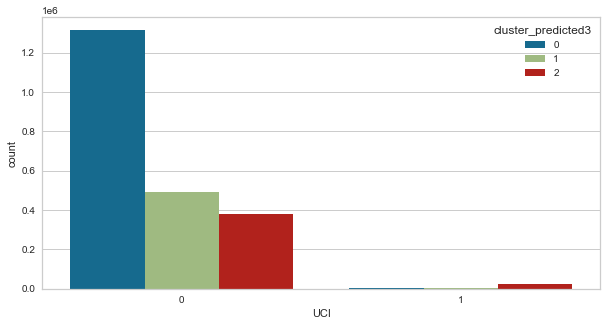

In [204]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['UCI'],order=combinedDf3["UCI"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()

### Los pertenecientes al grupo 2 son los que más tiempo han pasado hospitalizados

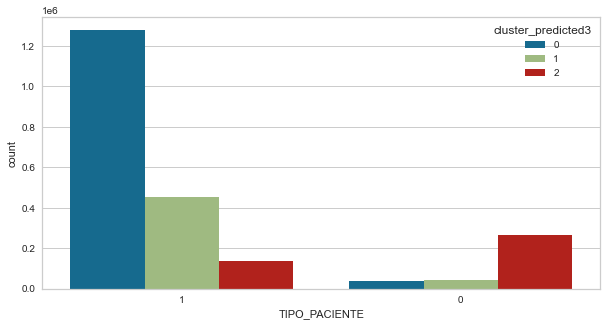

In [205]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['TIPO_PACIENTE'],order=combinedDf3["TIPO_PACIENTE"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()


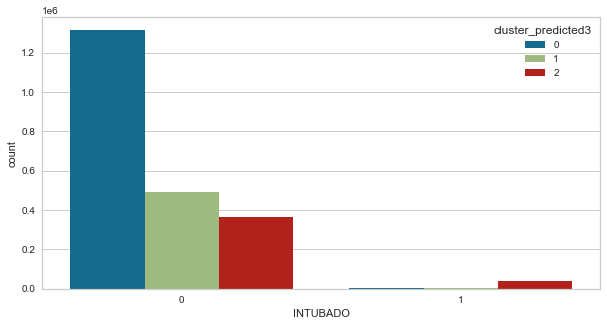

In [206]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['INTUBADO'],order=combinedDf3["INTUBADO"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()